## Preparing the webscrapping page lists.

* Creating a list of web pages belong to specific cities and search items
* Creating an empty dataframe to drop the data inside, breaking the for loop in soup by returning None objects and save time.
* Checking the dataframe after each list run, to verify if the list were completed or not, by comparing the row count of the dataframe with the list index, if an list were interrupped earlier, re-run the scrapping from the new index in the web page list

In [2]:
#set up environment
import requests
import bs4
from bs4 import BeautifulSoup
import pandas as pd
import time

import matplotlib.pyplot as plt
import pandas_profiling
import seaborn as sns

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [97]:
#set up Victoria List
url_list = []
for page in range (1, 350):
    temp_url = "https://au.indeed.com/jobs?q=data+$20,000&l=Victoria&start=%s" % ((page-1)*10)
    #conducting a request of the stated URL above:
    content = requests.get(temp_url)
    #specifying a desired format of “page” using the html parser - this allows python to 
    #read the various components of the page, rather than treating it as one long string.
    page_soup = BeautifulSoup(markup=content.text,features='lxml')
    #printing soup in a more structured tree 
    #format that makes for easier reading
    for div in page_soup.find_all(name='div', 
                                  attrs={'class':
                                         'jobsearch-SerpJobCard'}):
        url_list.append(div['data-jk'])
                        
len(url_list)

KeyboardInterrupt: 

In [ ]:
#Set up Sydney List
url_list2 = []
for page in range (1, 300):
    temp_url = "https://au.indeed.com/jobs?q=data+$20,000&l=Sydney&start=%s" % ((page-1)*10)
    #conducting a request of the stated URL above:
    content = requests.get(temp_url)
    #specifying a desired format of “page” using the html parser - this allows python to 
    #read the various components of the page, rather than treating it as one long string.
    page_soup = BeautifulSoup(markup=content.text,features='lxml')
    #printing soup in a more structured tree 
    #format that makes for easier reading
    for div in page_soup.find_all(name='div', 
                                  attrs={'class':
                                         'jobsearch-SerpJobCard'}):
        url_list2.append(div['data-jk'])
len(url_list2)

In [ ]:
#Set up Brisbane list
url_list3 = []
for page in range (1, 300):
    temp_url = "https://au.indeed.com/jobs?q=data+$20,000&l=Brisbane&start=%s" % ((page-1)*10)
    time.sleep(0.2)
    #conducting a request of the stated URL above:
    content = requests.get(temp_url)
    #specifying a desired format of “page” using the html parser - this allows python to 
    #read the various components of the page, rather than treating it as one long string.
    page_soup = BeautifulSoup(markup=content.text,features='lxml')
    #printing soup in a more structured tree 
    #format that makes for easier reading
    for div in page_soup.find_all(name='div', 
                                  attrs={'class':
                                         'jobsearch-SerpJobCard'}):
        url_list3.append(div['data-jk'])
len(url_list3)

In [ ]:
#Set up ACT job list
url_list4 = []
for page in range (1, 300):
    temp_url = "https://au.indeed.com/jobs?q=data+$20,000&l=Canberra&start=%s" % ((page-1)*10)
    time.sleep(0.2)
    #conducting a request of the stated URL above:
    content = requests.get(temp_url)
    #specifying a desired format of “page” using the html parser - this allows python to 
    #read the various components of the page, rather than treating it as one long string.
    page_soup = BeautifulSoup(markup=content.text,features='lxml')
    #printing soup in a more structured tree 
    #format that makes for easier reading
    for div in page_soup.find_all(name='div', 
                                  attrs={'class':
                                         'jobsearch-SerpJobCard'}):
        url_list4.append(div['data-jk'])
len(url_list4)

In [ ]:
#Check List content
url_list4[:10]

In [ ]:
# https://au.indeed.com/viewjob?jk=68235e154957be93

In [ ]:
# def get_url(soup):
#     urls = []
#     for div in soup.find_all(name='div', attrs={'class':'jobsearch-SerpJobCard'}):
#         print(div['data-jk'])
#         #         for link in div.find_all(name='a'):
# #         print(div)

# get_url(soup)

In [ ]:
#Set up data frame for all cities, each data frame will have 
#8000 rows, first one for melbourne and sydney, second one for the rest
city_set = ['Melbourne','Sydney','Brisbane','Peth']
columns = ['job_title','location','work_type','company_name','company_rating', 'salary','desc']
sample_df = pd.DataFrame(columns = columns)
sample_df['job_title'] = ['e' for number in range(8000)]

In [ ]:
#Set up data frame 2 for Brisbane
sample_df2 = pd.DataFrame(columns = columns)
sample_df2['job_title'] = ['e' for number in range(8000)]

In [ ]:
#check dataframe shape
sample_df.shape

In [ ]:
# #scraping code:
# # job_title = []
# # location = []
# # work_type = []
# # company_name = []
# # company_rating = []
# # salary = []
# # desc = []
# for i,k in enumerate(url_list):
#     temp_url2 = 'https://au.indeed.com/viewjob?jk=' + k
#     time.sleep(1)  #ensuring at least 1 second between page grabs
#     content2 = requests.get(temp_url2)
#     soup2 = BeautifulSoup(content2.text, 'lxml', from_encoding='utf-8')
#     for item in soup2.find_all(name='h3', attrs={'class':'icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title'}):
#         #print(item.text)
#          job_title.append(item.text)

# job_title

In [ ]:
# sample_df['job_title'] = job_title

In [ ]:
#Check dataframe
sample_df.head()

In [ ]:
#Scrapping for Melbourne
for i,k in enumerate(url_list):
    temp_url2 = 'https://au.indeed.com/viewjob?jk=' + k
    time.sleep(0.2)  #ensuring at least 1 second between page grabs
    content2 = requests.get(temp_url2)
    soup2 = BeautifulSoup(content2.text, 'lxml', from_encoding='utf-8')
    jt = soup2.find(name='h3', attrs={'class':'icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title'})
    if jt is not None:
        sample_df.job_title[i] = jt.text
        cn = soup2.find(name='div',attrs={'class':'icl-u-lg-mr--sm icl-u-xs-mr--xs'})
        if cn is not None:
            sample_df.company_name[i] = cn.text
        else:
            sample_df.company_name[i] = url_list[i]
        rt = soup2.find(name='meta',attrs={'itemprop':'ratingValue'})
        if rt is not None:
            sample_df.company_rating[i] = rt["content"]
        lc = soup2.find(name='span',attrs={'class':'jobsearch-JobMetadataHeader-iconLabel'})
        if lc is not None:
            if "$" in lc:
                sample_df.salary = lc.text
            else:
                sample_df.location[i] = lc.text
            metalist = soup2.find_all(name='span',attrs={'class':'jobsearch-JobMetadataHeader-iconLabel'})
            for x in range(1,len(metalist)):
                if "$" in metalist[x].text:
                    sample_df.salary[i] = metalist[x].text
                else:
                    sample_df.work_type[i] = metalist[x].text
        desc = soup2.find(name='div',attrs={'class':'jobsearch-jobDescriptionText'})
        if desc is not None:
            sample_df.desc[i] = desc.text

#     functions = soup2.find_all(name='span', attrs={'class':'jobsearch-JobMetadataHeader-iconLabel'})
#     print(functions)
#     print(len(functions))
#     for t in range(len(functions)):
#         if functions[t].text.find('$'):
#             sample_df.salary[i] = functions[t].text
#         elif 
            
    
#     if len(functions)==0:
#         work_type.append('NA')
#     else:
#         for item in functions:
#             print(item)
    
        
#sample_df['job_title'] = job_title

In [ ]:
#Review the breaks in the table and update the query
rowcount = len(sample_df[~(sample_df['job_title']=='e')].index)
rowcount

#### sample_df.location.value_counts()

In [ ]:
#Scrapping for Sydney
for j,k in enumerate(url_list2[260:]):
    temp_url3 = 'https://au.indeed.com/viewjob?jk=' + k
    time.sleep(0.2)  #ensuring at least 1 second between page grabs
    content2 = requests.get(temp_url3)
    soup2 = BeautifulSoup(content2.text, 'lxml', from_encoding='utf-8')
    i = j + rowcount
    jt = soup2.find(name='h3', attrs={'class':'icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title'})
    if jt is not None:
        sample_df.job_title[i] = jt.text
        cn = soup2.find(name='div',attrs={'class':'icl-u-lg-mr--sm icl-u-xs-mr--xs'})
        if cn is not None:
            sample_df.company_name[i] = cn.text
        else:
            sample_df.company_name[i] = url_list2[j]
        rt = soup2.find(name='meta',attrs={'itemprop':'ratingValue'})
        if rt is not None:
            sample_df.company_rating[i] = rt["content"]
        lc = soup2.find(name='span',attrs={'class':'jobsearch-JobMetadataHeader-iconLabel'})
        if lc is not None:
            if "$" in lc:
                sample_df.salary = lc.text
            else:
                sample_df.location[i] = lc.text
            metalist = soup2.find_all(name='span',attrs={'class':'jobsearch-JobMetadataHeader-iconLabel'})
            for x in range(1,len(metalist)):
                if "$" in metalist[x].text:
                    sample_df.salary[i] = metalist[x].text
                else:
                    sample_df.work_type[i] = metalist[x].text
        desc = soup2.find(name='div',attrs={'class':'jobsearch-jobDescriptionText'})
        if desc is not None:
            sample_df.desc[i] = desc.text


In [ ]:
#Review the breaks in the table and update the query
# sample_df[~(sample_df['job_title']=='e')]
sample_df = sample_df.dropna(subset=['salary'])
sample_df

In [ ]:
#     #specifying row num for index of job posting in dataframe
#     num = (len(sample_df) + 1) 
#     #creating an empty list to hold the data for each posting
#     job_post = [] 
#     #append city name
#     job_post.append(city) 
#     #grabbing job title
#     for a in div.find_all(name=”a”, attrs={“data-tn-element”:”jobTitle”}):
#       job_post.append(a[“title”]) 
#     #grabbing company name
#     company = div.find_all(name=”span”, attrs={“class”:”company”}) 
#     if len(company) > 0: 
#       for b in company:
#         job_post.append(b.text.strip()) 
#     else: 
#       sec_try = div.find_all(name=”span”, attrs={“class”:”result-link-source”})
#       for span in sec_try:
#         job_post.append(span.text) 
#     #grabbing location name
#     c = div.findAll(‘span’, attrs={‘class’: ‘location’}) 
#     for span in c: 
#       job_post.append(span.text) 
#     #grabbing summary text
#     d = div.findAll(‘span’, attrs={‘class’: ‘summary’}) 
#       for span in d:
#         job_post.append(span.text.strip()) 
#     #grabbing salary
#     try:
#       job_post.append(div.find(‘nobr’).text) 
#     except:
#       try:
#         div_two = div.find(name=”div”, attrs={“class”:”sjcl”}) 
#         div_three = div_two.find(“div”) 
#         job_post.append(div_three.text.strip())
#       except:
#         job_post.append(“Nothing_found”) 
#     #appending list of job post info to dataframe at index num
#     sample_df.loc[num] = job_post

In [ ]:
#Drop duplicate based on desc and reset index
sample_df = sample_df.drop_duplicates(subset='desc').reset_index(drop=True)
sample_df

In [ ]:
#Save file to local drive
sample_df.to_csv('jobdata1.csv', encoding='utf-8')

In [ ]:
#check final shape
sample_df.shape

In [ ]:
#scrapping for brisbane
for i,k in enumerate(url_list3):
    temp_url2 = 'https://au.indeed.com/viewjob?jk=' + k
    time.sleep(0.2)  #ensuring at least 1 second between page grabs
    content2 = requests.get(temp_url2)
    soup2 = BeautifulSoup(content2.text, 'lxml', from_encoding='utf-8')
    jt = soup2.find(name='h3', attrs={'class':'icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title'})
    if jt is not None:
        sample_df2.job_title[i] = jt.text
        cn = soup2.find(name='div',attrs={'class':'icl-u-lg-mr--sm icl-u-xs-mr--xs'})
        if cn is not None:
            sample_df2.company_name[i] = cn.text
        else:
            sample_df2.company_name[i] = url_list3[i]
        rt = soup2.find(name='meta',attrs={'itemprop':'ratingValue'})
        if rt is not None:
            sample_df2.company_rating[i] = rt["content"]
        lc = soup2.find(name='span',attrs={'class':'jobsearch-JobMetadataHeader-iconLabel'})
        if lc is not None:
            if "$" in lc:
                sample_df2.salary = lc.text
            else:
                sample_df2.location[i] = lc.text
            metalist = soup2.find_all(name='span',attrs={'class':'jobsearch-JobMetadataHeader-iconLabel'})
            for x in range(1,len(metalist)):
                if "$" in metalist[x].text:
                    sample_df2.salary[i] = metalist[x].text
                else:
                    sample_df2.work_type[i] = metalist[x].text
        desc = soup2.find(name='div',attrs={'class':'jobsearch-jobDescriptionText'})
        if desc is not None:
            sample_df2.desc[i] = desc.text

In [ ]:
rowcount2 = len(sample_df2[~(sample_df2['job_title']=='e')].index)
rowcount2

In [ ]:
#scrapping for brisbane
for t,k in enumerate(url_list4):
    temp_url2 = 'https://au.indeed.com/viewjob?jk=' + k
    time.sleep(0.2)  #ensuring at least 1 second between page grabs
    i = t + rowcount2
    content2 = requests.get(temp_url2)
    soup2 = BeautifulSoup(content2.text, 'lxml', from_encoding='utf-8')
    jt = soup2.find(name='h3', attrs={'class':'icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title'})
    if jt is not None:
        sample_df2.job_title[i] = jt.text
        cn = soup2.find(name='div',attrs={'class':'icl-u-lg-mr--sm icl-u-xs-mr--xs'})
        if cn is not None:
            sample_df2.company_name[i] = cn.text
        else:
            sample_df2.company_name[i] = url_list4[t]
        rt = soup2.find(name='meta',attrs={'itemprop':'ratingValue'})
        if rt is not None:
            sample_df2.company_rating[i] = rt["content"]
        lc = soup2.find(name='span',attrs={'class':'jobsearch-JobMetadataHeader-iconLabel'})
        if lc is not None:
            if "$" in lc:
                sample_df2.salary = lc.text
            else:
                sample_df2.location[i] = lc.text
            metalist = soup2.find_all(name='span',attrs={'class':'jobsearch-JobMetadataHeader-iconLabel'})
            for x in range(1,len(metalist)):
                if "$" in metalist[x].text:
                    sample_df2.salary[i] = metalist[x].text
                else:
                    sample_df2.work_type[i] = metalist[x].text
        desc = soup2.find(name='div',attrs={'class':'jobsearch-jobDescriptionText'})
        if desc is not None:
            sample_df2.desc[i] = desc.text


In [ ]:
#check how many rows the dataframe has been populated
sample_df2.shape
sample_df2[~(sample_df2['job_title']=='e')]

In [ ]:
sample_df2 = sample_df2.dropna(subset=['salary'])
sample_df2

In [ ]:
sample_df2 = sample_df2.drop_duplicates(subset='desc').reset_index(drop=True)

In [ ]:
sample_df2 = sample_df2.drop(columns='Unnamed: 0')
sample_df2

In [ ]:
sample_df2.to_csv('jobdata2.csv', encoding='utf-8')

In [ ]:
sample_df = pd.read_csv('jobdata1.csv')
sample_df2 = pd.read_csv('jobdata2.csv')

In [ ]:
final_job_list = [sample_df, sample_df2]

In [ ]:
final_job = pd.concat(final_job_list, sort=False)

In [ ]:
#final_job = final_job.drop(columns='Unnamed: 0')
final_job.location.value_counts()

In [ ]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(final_job)

In [ ]:
profile

In [ ]:
final_job.salary.value_counts()

In [ ]:
url_list5 = []
for page in range (1, 300):
    temp_url = "https://au.indeed.com/jobs?q=data+$20,000&l=Perth&start=%s" % ((page-1)*10)
    time.sleep(0.2)
    #conducting a request of the stated URL above:
    content = requests.get(temp_url)
    #specifying a desired format of “page” using the html parser - this allows python to 
    #read the various components of the page, rather than treating it as one long string.
    page_soup = BeautifulSoup(markup=content.text,features='lxml')
    #printing soup in a more structured tree 
    #format that makes for easier reading
    for div in page_soup.find_all(name='div', 
                                  attrs={'class':
                                         'jobsearch-SerpJobCard'}):
        url_list5.append(div['data-jk'])
len(url_list5)

In [ ]:
sample_df3 = pd.DataFrame(columns = columns)
sample_df3['job_title'] = ['e' for number in range(8000)]

In [ ]:
#Scrapping for Melbourne
for i,k in enumerate(url_list5):
    temp_url2 = 'https://au.indeed.com/viewjob?jk=' + k
    time.sleep(0.2)  #ensuring at least 1 second between page grabs
    content2 = requests.get(temp_url2)
    soup2 = BeautifulSoup(content2.text, 'lxml', from_encoding='utf-8')
    jt = soup2.find(name='h3', attrs={'class':'icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title'})
    if jt is not None:
        sample_df3.job_title[i] = jt.text
        cn = soup2.find(name='div',attrs={'class':'icl-u-lg-mr--sm icl-u-xs-mr--xs'})
        if cn is not None:
            sample_df3.company_name[i] = cn.text
        else:
            sample_df3.company_name[i] = url_list5[i]
        rt = soup2.find(name='meta',attrs={'itemprop':'ratingValue'})
        if rt is not None:
            sample_df3.company_rating[i] = rt["content"]
        lc = soup2.find(name='span',attrs={'class':'jobsearch-JobMetadataHeader-iconLabel'})
        if lc is not None:
            if "$" in lc:
                sample_df3.salary = lc.text
            else:
                sample_df3.location[i] = lc.text
            metalist = soup2.find_all(name='span',attrs={'class':'jobsearch-JobMetadataHeader-iconLabel'})
            for x in range(1,len(metalist)):
                if "$" in metalist[x].text:
                    sample_df3.salary[i] = metalist[x].text
                else:
                    sample_df3.work_type[i] = metalist[x].text
        desc = soup2.find(name='div',attrs={'class':'jobsearch-jobDescriptionText'})
        if desc is not None:
            sample_df3.desc[i] = desc.text

In [ ]:
sample_df3

In [ ]:
sample_df3 = sample_df3.dropna(subset=['salary'])
sample_df3

In [ ]:
sample_df3 = sample_df3.drop_duplicates(subset='desc').reset_index(drop=True)
sample_df3

In [ ]:
# sample_df3 = sample_df3.drop(columns='Unnamed: 0')
# sample_df3

In [ ]:
sample_df3.to_csv('jobdata3.csv', encoding='utf-8')

In [ ]:
final_job2 = pd.concat([final_job, sample_df3])

In [ ]:
final_job2 = final_job2.reset_index(drop=True)

## Extract more information from the scrapped data
* Created rate type based on the salary, i.e. per hour, per day or per week, so we can unified all the salary information
* Calculated the annual income for various payment time, taking into account of the income differences between freelance and employee type job
* Extract location information, only state code were used for locations as locations does impact pay level as some study point out ACT has higher pay range to mitigate the unpleasant living space. However to avoid high cardinality to render this column useless, only the state codes were used.
* prepare the text column to include job title and job description for NLP model.

In [ ]:
salary2 = [i.split(' ') for i in final_job2.salary.values]
# salary2

In [ ]:
final_job2['rate_type'] = [i[-1] for i in salary2]
final_job2.rate_type.value_counts()

In [ ]:
final_job2['min'] = [float(i[0].replace(',','').replace('$','')) for i in salary2]
final_job2['min'].head(20)

In [ ]:
final_job2['max'] = [float(i[2].replace('$','').replace(',','')) 
                         if len(i)>4 else float(i[0].replace('$','').replace(',',''))
                    for i in salary2]
final_job2['max'].head()

In [ ]:
final_job2['mean'] = (final_job2['min'] + final_job2['max'])/2

In [ ]:
final_job2.head(10)

In [ ]:
#converting non annual rate to annual one, taking 38 hours, 45 weeks as a standard, 10.3 months approximately
final_job2['mean_anual'] = 0
final_job2['mean_anual'][final_job2['rate_type']=='hour'] = final_job2['mean'][final_job2['rate_type']=='hour']*1710
final_job2['mean_anual'][final_job2['rate_type']=='day'] = final_job2['mean'][final_job2['rate_type']=='day']*225
final_job2['mean_anual'][final_job2['rate_type']=='week'] = final_job2['mean'][final_job2['rate_type']=='week']*45
final_job2['mean_anual'][final_job2['rate_type']=='month'] = final_job2['mean'][final_job2['rate_type']=='month']*10.3
final_job2['mean_anual'][final_job2['rate_type']=='year'] = final_job2['mean'][final_job2['rate_type']=='year']
#round up salary needed?
final_job2['mean_anual2']= final_job2.mean_anual.round(decimals=-3)

In [ ]:
final_job2.head()

In [ ]:
#Generate the state information from the location string, 
#using the last item from the location string separating with space
final_job2['state'] = [i.split(' ')[-1] 
#                        if len(i.split(' '))<3 
#                        else i.split(' ')[-2] 
                       for i in final_job2['location']]
final_job2['state'][final_job2['state']=='Victoria'] = 'VIC'
final_job2['state'][final_job2['state']=='Australia'] = 'ACT'
final_job2['state'].value_counts()

In [ ]:
#converting number postcode into charaters to indicating states
def statecode(x):
    if len(x)>3 & len(x)<5:
        if int(x) < 3000:
            return 'NSW'
        elif int(x) < 4000:
            return 'VIC'
        elif int(x) < 5000:
            return 'QLD'
        else:
            return 'WA'
final_job2['state'] = [i if len(i)<4 else statecode(i) for i in final_job2['state']]
final_job2['state'].value_counts()

In [ ]:
final_job2.head(10).T

In [ ]:
#Concatenating the title and job description
final_job2['titlendesc'] = final_job2['job_title'] + ' ' + final_job2['desc']

In [ ]:
#Save the data to csv file
final_job2.to_csv('fjobdata.csv', encoding='utf-8')

# To skip all the above data scrapping part, please start with the below code only

In [ ]:
#Reload the data
final_job2 = pd.read_csv('fjobdata.csv')

In [ ]:
final_job2.head(10).T
final_job2.total[0]

## Create word cloud for presentation
* word cloud picture of job title indicate that the algo used by indeed website is not very precise. 

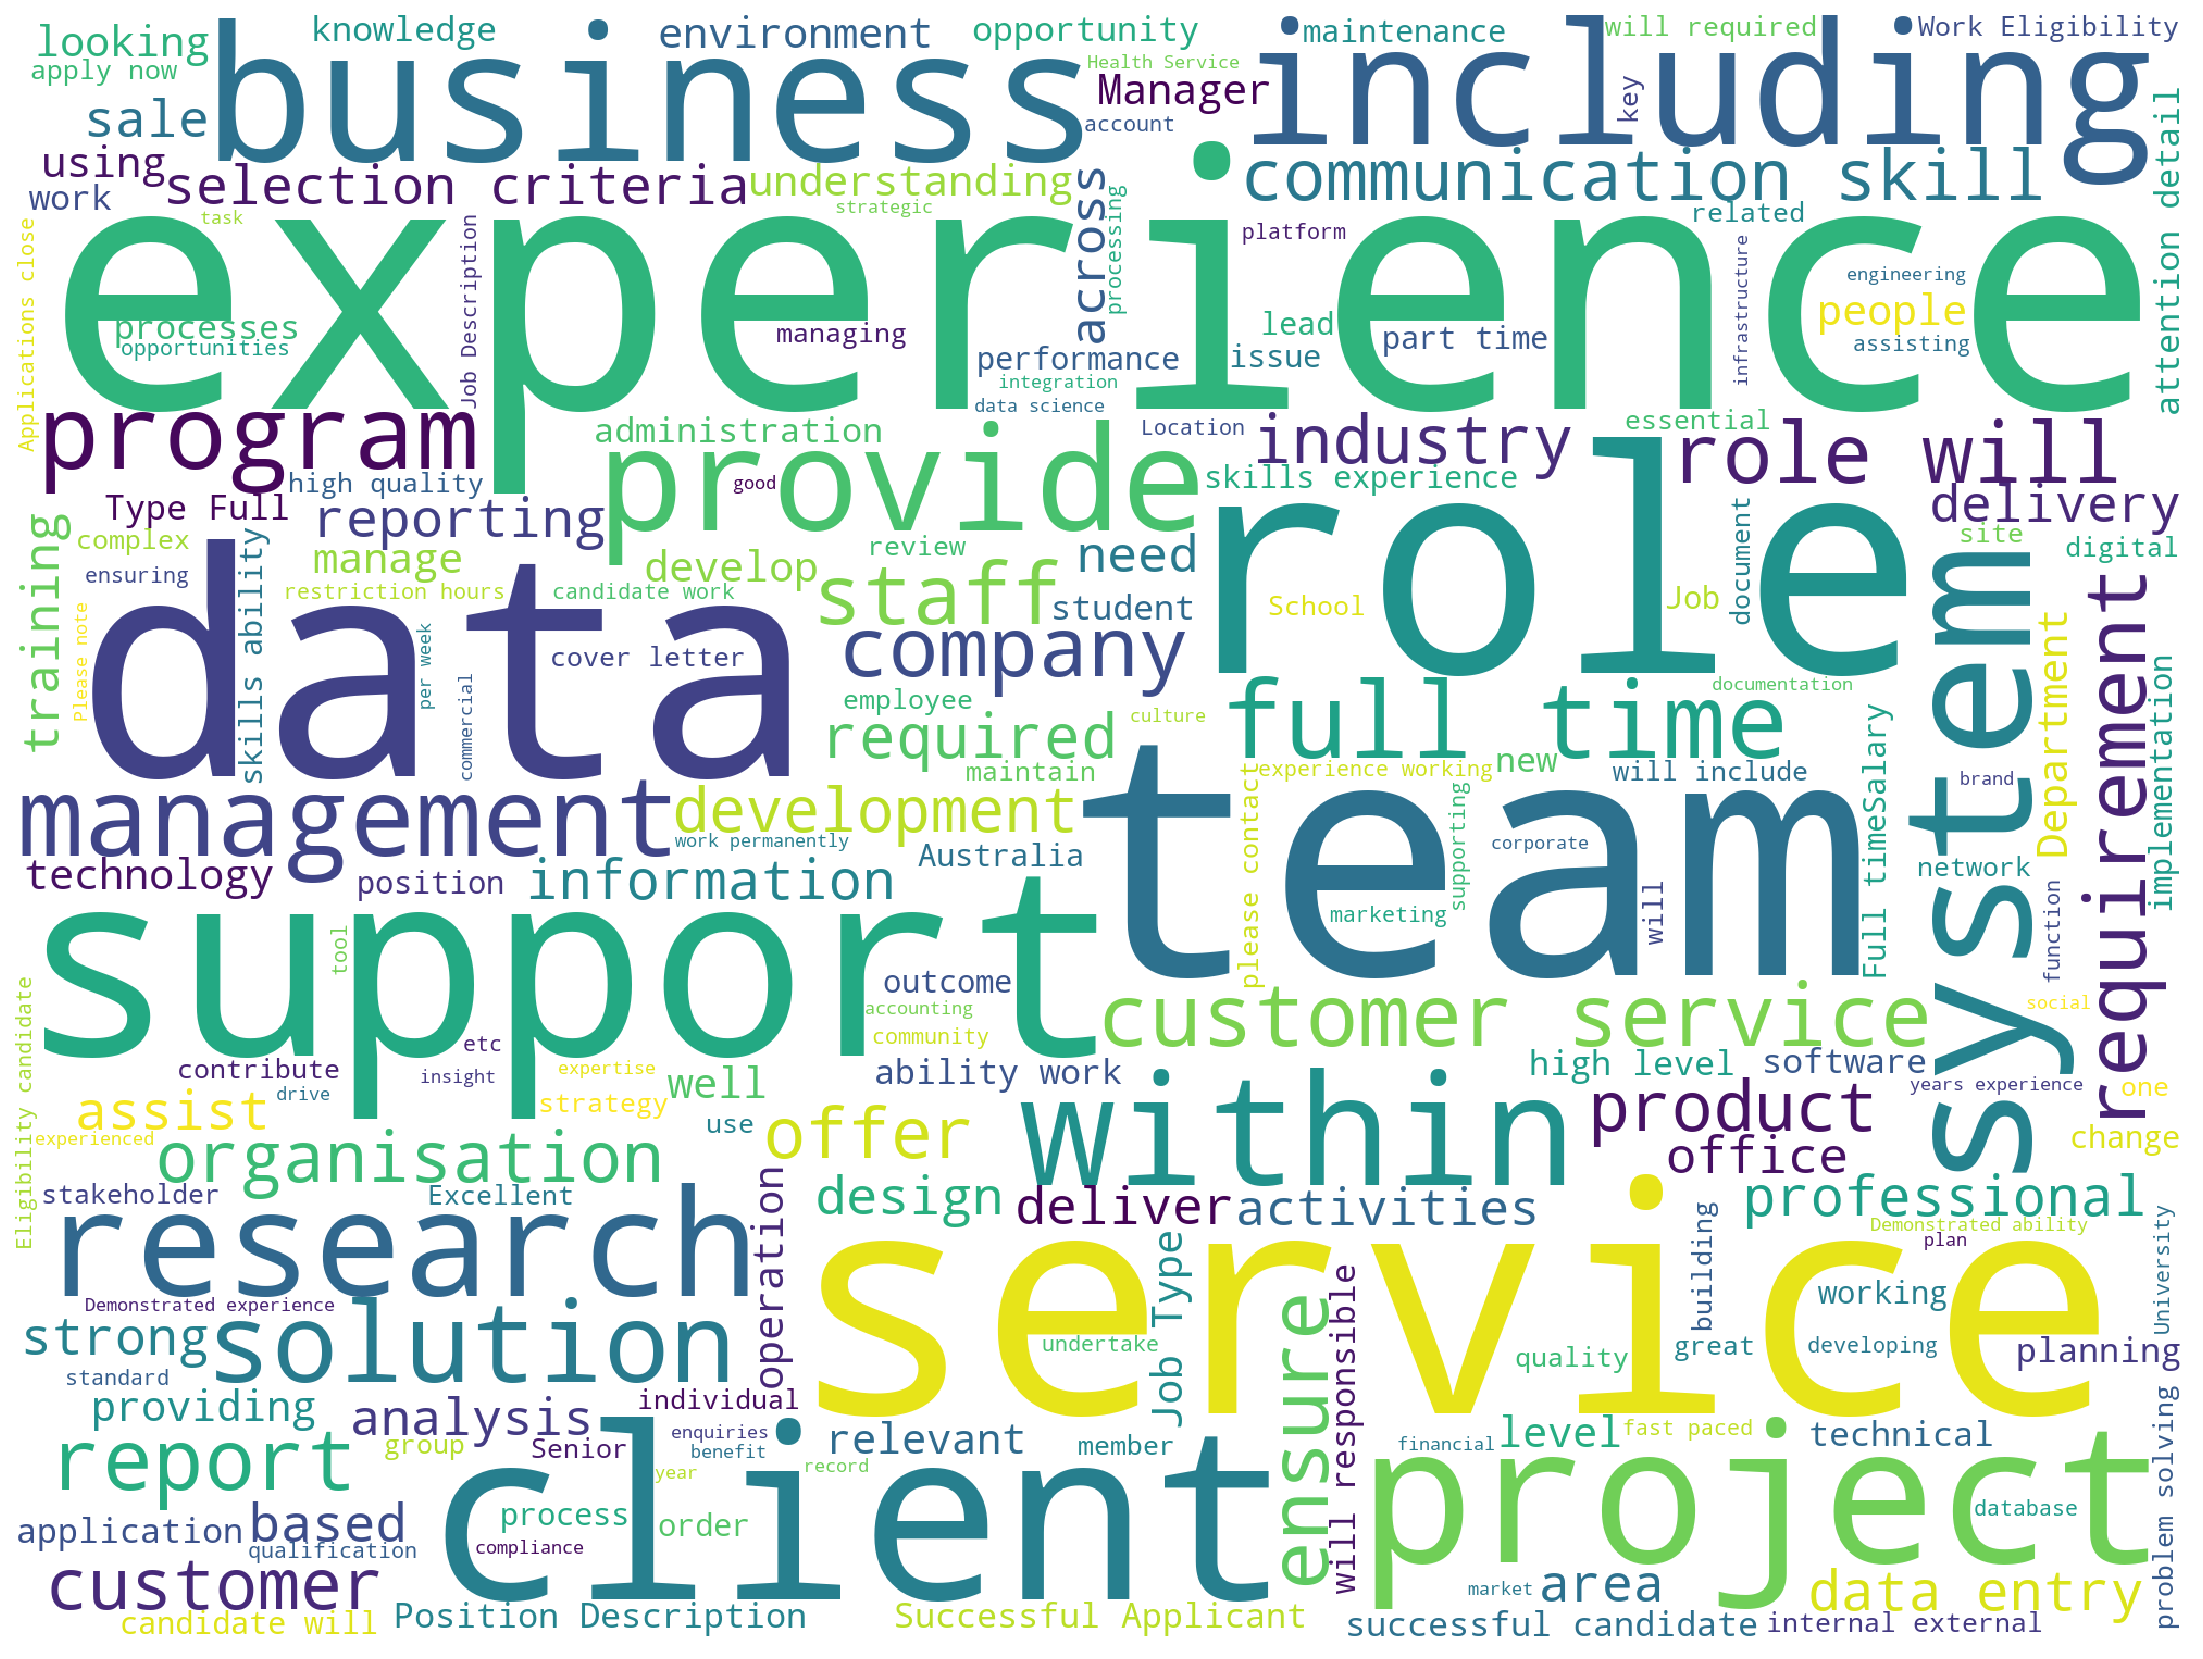

In [332]:
#Generating wordcloud for job description
from wordcloud import WordCloud, STOPWORDS

jd_string = ' '.join(final_job2['desc'])

wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white', height = 1500, width = 2000).generate(jd_string)

plt.figure(figsize=(20,15))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

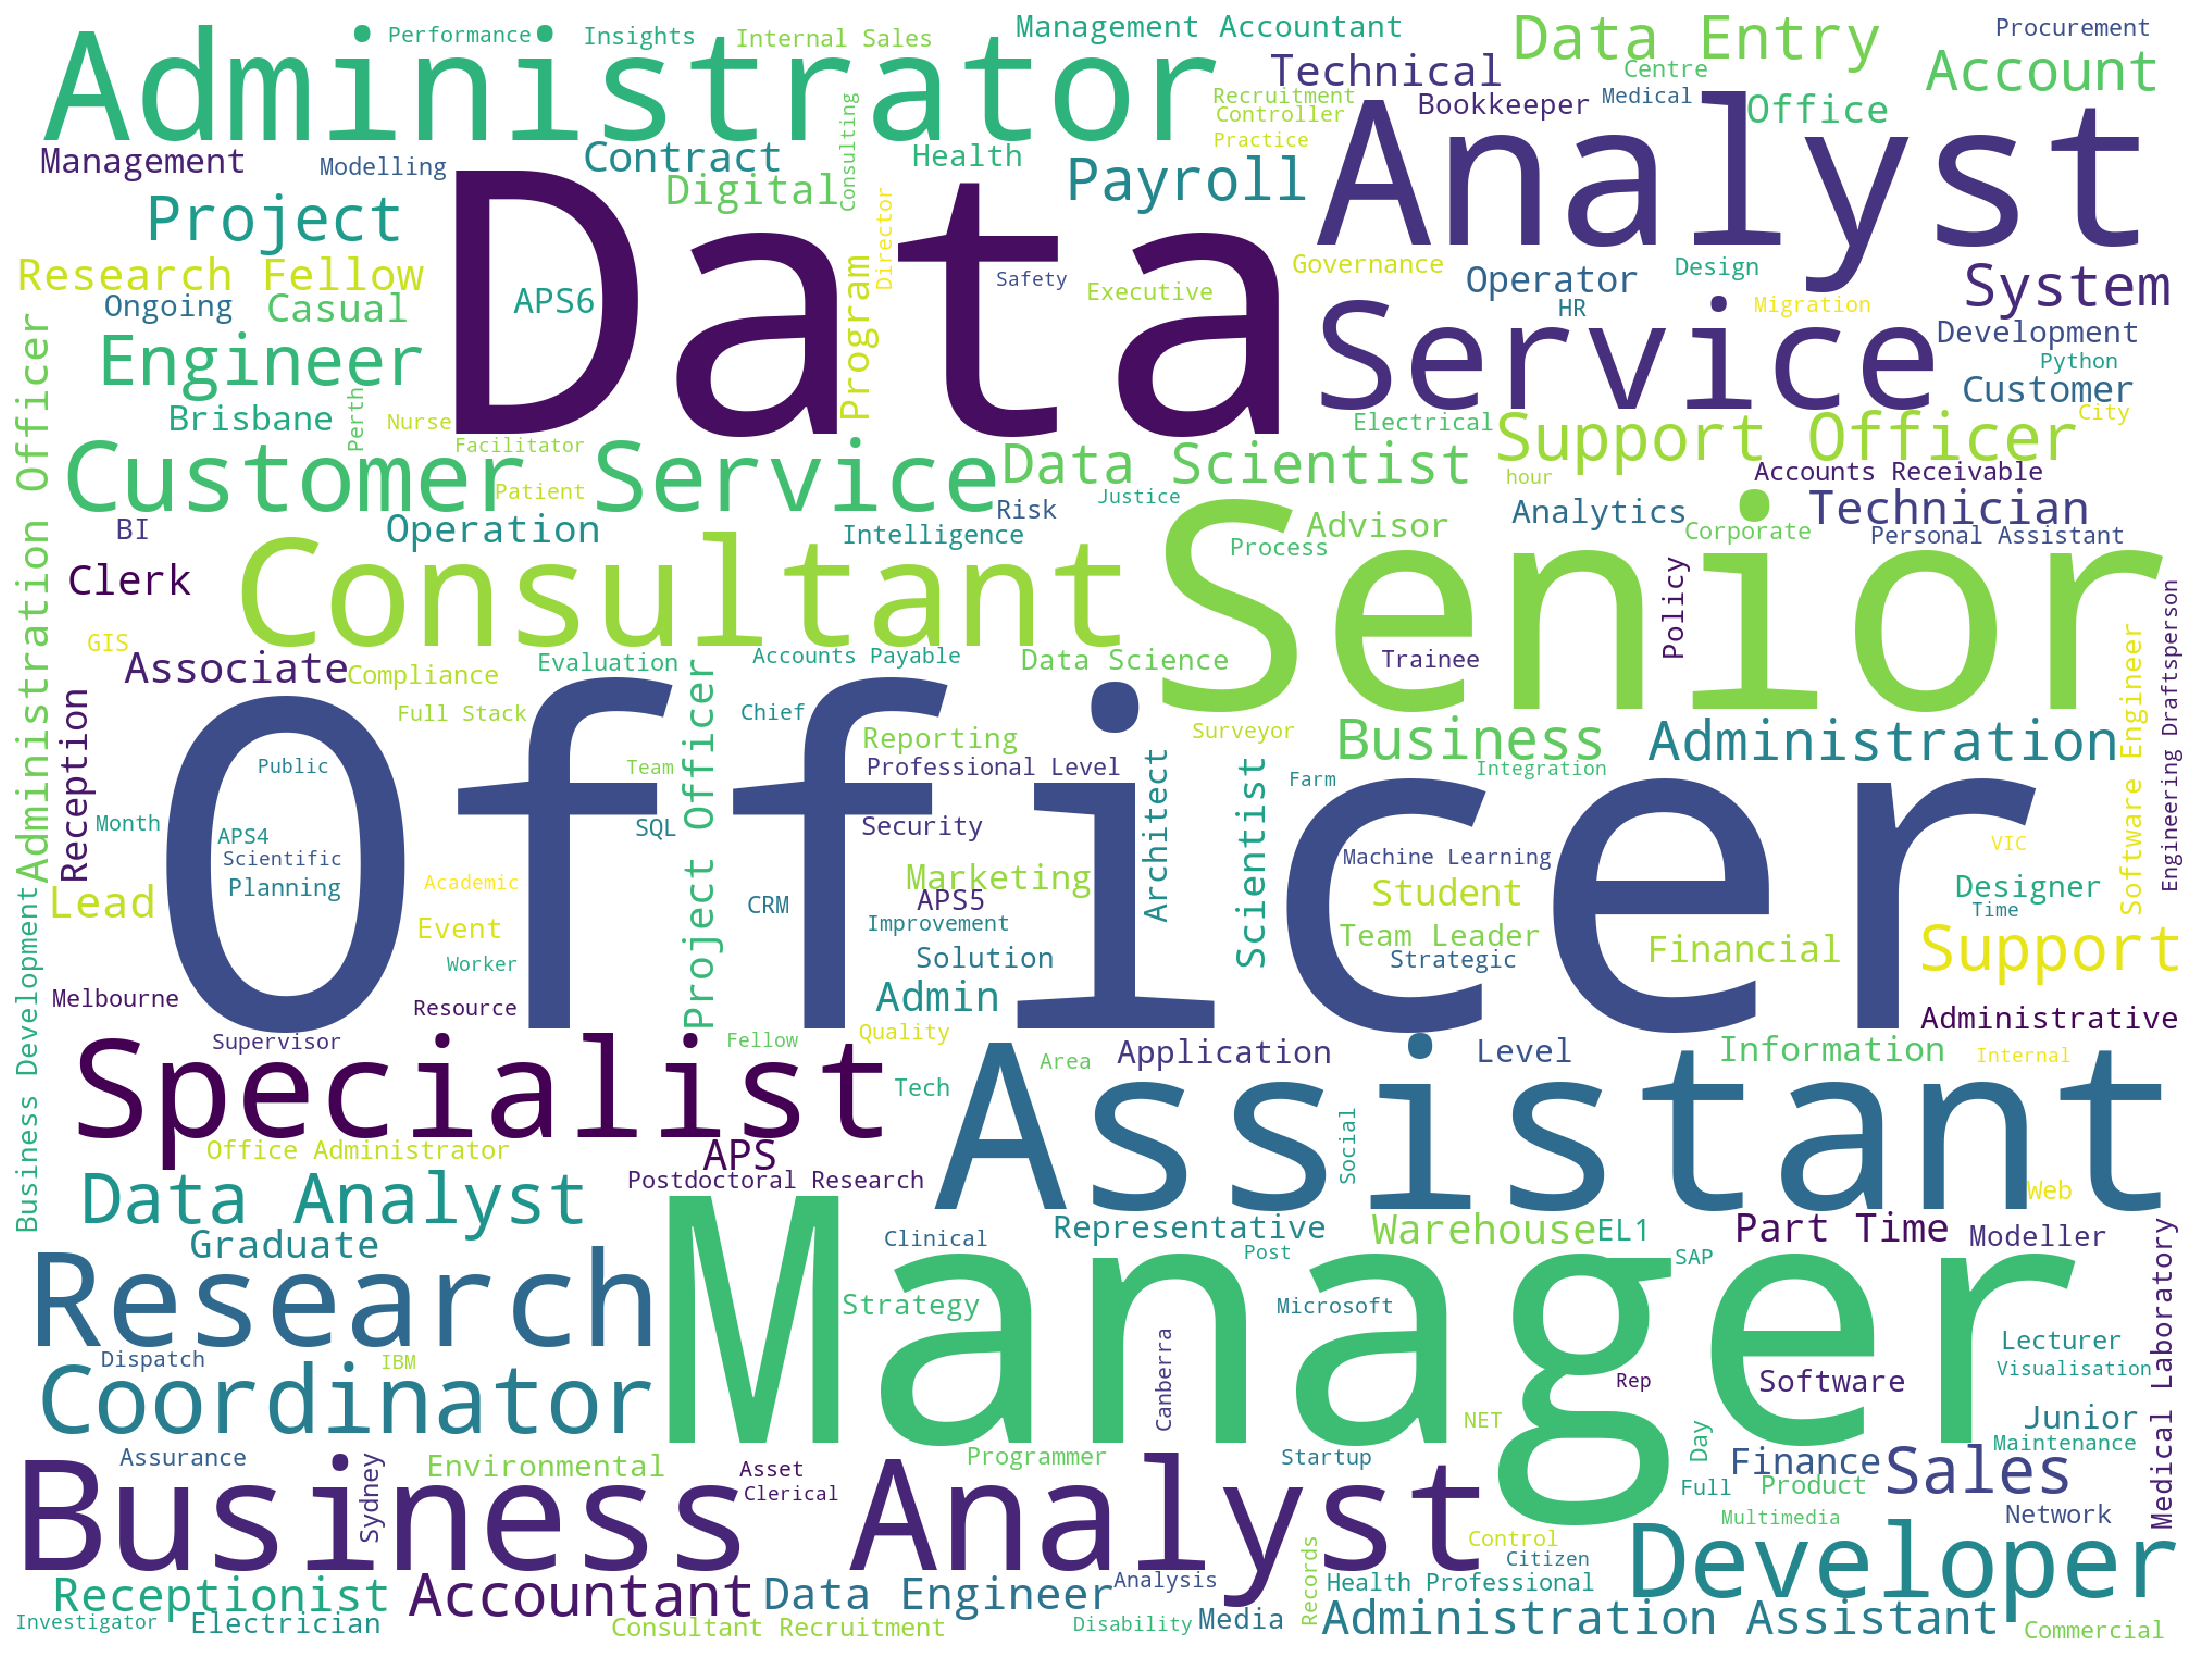

In [363]:
#Generate wordcloud for job title, funny thing officer is 
#the most mentioned word. this indicate the search algo from indeed is not that accurate
from wordcloud import WordCloud, STOPWORDS

jd_string = ' '.join(final_job2['job_title'])

wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white', height = 1500, width = 2000).generate(jd_string)

plt.figure(figsize=(20,15))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
final_job2.mean_anual.describe()

In [ ]:
#Generating salary rank classification targets
def salaryrank(x):
    if x < 55000:
        return '0.0'
    elif x < 72753.5:
        return '1.0'
    else:
        return '2.0'
    
final_job2['salaryrank'] = [salaryrank(i) for i in final_job2.mean_anual.values]

In [ ]:
final_job2.head(10).T

In [ ]:
final_job2['company_rating']=final_job2['company_rating'].fillna('Not Available')
final_job2.head().T

In [ ]:
#Generating a columns which will include all the job information as a text column for NLP
final_job2['total'] = 'Location:'+ final_job2['location'] + ', '  \
                    + 'Company name:' + final_job2['company_name'] + ', '\
                    + 'Company rating:' + final_job2['company_rating'].astype(str) + ', '\
                    + 'Pay frequency:' + final_job2['rate_type'] + ', '\
                    + 'State:' + final_job2['state'] + ', '\
                    + 'JobTitle and ' + 'JobDescription:' + final_job2['titlendesc']

In [ ]:
# import re
# final_job2['total'] = final_job2['total'].apply(lambda x: re.sub(r'([a-z](?=[A-Z])|[A-Z](?=[A-Z][a-z]))', r'\1 ', x\
#       .replace(':',': ').replace(')',') ')))
final_job2['total'][0]

## EDA is not needed as the job data has been cleaned and presented by the website
* Fastai will take care of the feature normalization and engineering by using embedding technique
* Loaded the fastai library
* Time constrain, no other models were attemped. However data was shared with other classmates, so model performances can be reviewed and compared
* First train the language model NLP part to learn the context (learner 1)
* Second using embedding technique to pitch the context agaisnt the salary classification (learner 2)
* Third use another tabular learner to include more features for linear regression (learner 3) 
* After three leaners, the accuracy and confusion matrix were plotted, accuracy > 70%, question 1 answered
* Use language model to predict skill key words for specific salaries, question 2 answered

In [5]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# import all the modules for text and tabular data from fastai, sometimes the import * will not work properly
#so everything should be reimported separately
from fastai import *
from fastai.text import *
#data block is the fastai data loader, it create the data object which is specified class for each type of learning, i.e
#text, image or tabular data
from fastai.data_block import *
from torchtext import vocab, data, datasets
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
tabular_learner

NameError: name 'tabular_learner' is not defined

In [ ]:
n = len(final_job2)

In [ ]:
#Create validation dataset with random split
def get_cv_idxs(n, cv_idx=0, val_pct=0.5, seed=42):
    """ Get a list of index values for Validation set from a dataset
    
    Arguments:
        n : int, Total number of elements in the data set.
        cv_idx : int, starting index [idx_start = cv_idx*int(val_pct*n)] 
        val_pct : (int, float), validation set percentage 
        seed : seed value for RandomState
        
    Returns:
        list of indexes 
    """
    np.random.seed(seed)
    n_val = int(val_pct*n)
    idx_start = cv_idx*n_val
    idxs = np.random.permutation(n)
    return idxs[idx_start:idx_start+n_val]

In [98]:
val_idx = get_cv_idxs(n, val_pct=0.4)
val_idx

array([294, 453, 638, 139, ..., 193, 432, 743, 578])

In [99]:
#check the if the random split has class imbalance, conclusion no class imbalance
final_job2.salaryrank[val_idx].value_counts()

2.0    202
0.0    108
1.0    103
Name: salaryrank, dtype: int64

In [100]:
#Creating a data file which will only be loaded by the NLP language model.
final_job2[['total','salaryrank']].to_csv('fj2.csv', encoding='utf-8')

In [101]:
#Create databunch for trainning the language model
bs=36
data_lm = (TextList.from_csv('./', 'fj2.csv', cols='total')
           #Inputs: all the text files in path
            #.filter_by_folder(include=['train', 'test', 'unsup']) 
           #We may have other temp folders that contain text files so we only keep what's in train and test
            .split_by_idx(val_idx)
           #We randomly split and keep 10% (10,000 reviews) for validation
            .label_for_lm()           
           #We want to do a language model so we label accordingly
            .databunch(bs=bs))
#Save the databunch for reuse in case notebook get reboot
data_lm.save('data_lm.pkl')

In [102]:
#Load the data bunch
data_lm = load_data('./', 'data_lm.pkl', bs=bs)

In [103]:
#preview the databunch, it is best to print out a single item, I have noticed that previously the text were not correctly populated using \n
data_lm.show_batch()

idx,text
0,an experienced xxup hse xxmaj safety xxmaj officer to join their team and co - ordinate all safety protocols during the development of the xxmaj solar xxmaj farm in xxmaj cohuna xxup vic . xxmaj the successful candidate will be responsible for provision of xxmaj safety xxmaj processes and xxmaj protocols during the xxmaj installation of xxmaj solar xxmaj energy xxmaj systems . xxmaj responsibilities : xxmaj to review and
1,"to the level determined by the xxmaj department xxmaj head . xxmaj to obtain this clearance applicants must be an xxmaj australian xxmaj citizen . \n xxmaj the incumbent will be required to complete the xxup xxunk requirements of the organisation , which may include local level training relating to equipment usage and xxmaj xxunk xxmaj chemicals . \n xxmaj the position may require you to work outside"
2,found in the position description . \n \n \n xxmaj benefits \n \n xxmaj salary sacrifice options \n xxmaj professional development opportunities \n xxmaj flexible working arrangements available \n xxmaj paid study leave \n xxmaj on - site gym and more ! \n \n \n xxmaj how to apply \n \n xxmaj for a xxmaj position xxmaj description and to submit an
3,", xxmaj state : xxup vic , xxmaj job xxmaj title and xxmaj job xxmaj description : xxmaj surveys xxmaj officer xxmaj job no : xxunk \n xxmaj work type : xxmaj full - time \n xxmaj location : xxmaj geelong - xxmaj city \n xxmaj categories : xxmaj administration \n xxmaj the xxmaj division : \n \n xxmaj the xxmaj strategic xxmaj intelligence and"
4,\n \n xxmaj the xxmaj australian - first xxmaj ai xxup lecs lab focuses on : \n \n xxmaj xxunk algorithms and xxunk performance techniques ( important for xxunk use and public accountability ) \n xxmaj xxunk image and video machine learning classification algorithms \n xxmaj image xxunk \n xxmaj scalable xxunk xxunk image detection techniques \n xxmaj techniques for leveraging massive law enforcement


In [104]:
#creating the language model using AWS_LSTM architect 
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.4)

In [105]:
#trial run to find the learning rate
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 8.32E-02
Min loss divided by 10: 3.02E-02
0.03019951720402019


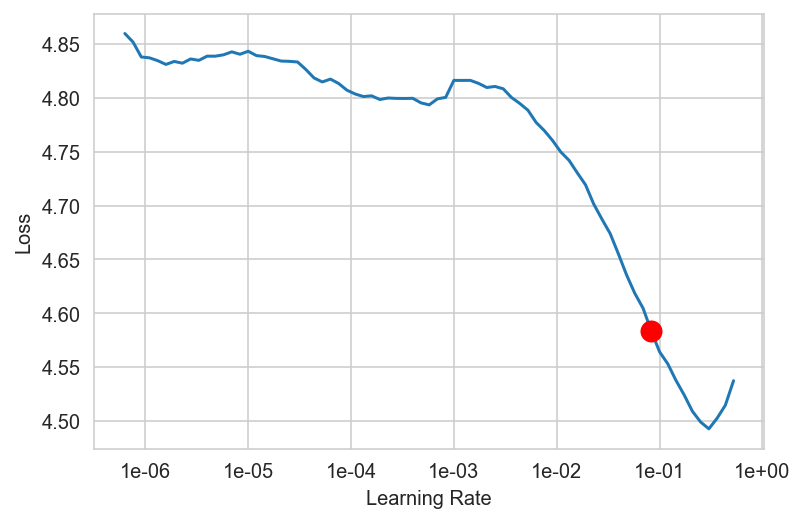

In [106]:
#withdraw the best learning rate from the recorder.
learn.recorder.plot(skip_end=15,suggestion=True)
lrs = learn.recorder.lrs
losses = learn.recorder.losses
mg = (np.gradient(np.array(losses))).argmin()
ml = np.argmin(losses)
min_grad_lr = lrs[mg]
min_loss_lr = lrs[ml]/10
print(min_loss_lr)
min_loss_lr = 3.02e-2

In [107]:
#use discrimitative learning rate and optimizer to train the model
learn.fit_one_cycle(7, min_loss_lr)

epoch,train_loss,valid_loss,accuracy,time
0,3.654872,3.199517,0.393551,07:55
1,3.152468,3.119119,0.411668,07:48
2,2.868008,3.021739,0.432339,07:50
3,2.597953,2.956726,0.445924,07:48
4,2.367929,2.869487,0.463564,07:30
5,2.125430,2.826837,0.472110,08:07
6,1.961532,2.819029,0.473990,07:55


In [108]:
# learn.save('fit_head')

In [109]:
# learn.load('fit_head')
# learn.unfreeze()
# learn.fit_one_cycle(4, 1e-3, moms=(0.85,0.7))

In [110]:
#save the language model
learn.save('fine_tuned')
learn.load('fine_tuned')
#save the language model encoder
learn.save_encoder('fine_tuned_enc')

In [111]:
#create classification for the encoded data
data_clas = (TextList.from_csv('./', 'fj2.csv', cols='total')
             #grab all the text files in path
             .split_by_idx(val_idx)
             #split by train and valid folder (that only keeps 'train' and 'test' so no need to filter)
             .label_from_df(cols='salaryrank',label_cls=FloatList)
             #label them all with their folders
             .databunch(bs=bs))

#save the data class object for later reuse.
data_clas.save('data_clas.pkl')

In [112]:
data_clas = load_data('./', 'data_clas.pkl', bs=bs)
data_clas.show_batch()

text,target
"xxbos xxmaj location : xxmaj queanbeyan xxup nsw 2620 , xxmaj company name : xxmaj queanbeyan - xxmaj palerang xxmaj regional xxmaj council , xxmaj company rating : xxmaj not xxmaj available , xxmaj pay frequency : week , xxmaj state : xxup nsw , xxmaj job xxmaj title and xxmaj job xxmaj description : xxmaj program xxmaj coordinator - xxmaj environmental xxmaj health xxmaj application xxmaj information xxmaj pack",2.0
"xxbos xxmaj location : xxmaj queanbeyan xxup nsw 2620 , xxmaj company name : xxmaj queanbeyan - xxmaj palerang xxmaj regional xxmaj council , xxmaj company rating : xxmaj not xxmaj available , xxmaj pay frequency : week , xxmaj state : xxup nsw , xxmaj job xxmaj title and xxmaj job xxmaj description : xxmaj foreman xxmaj concreting and xxmaj footpaths ( xxmaj ongoing ) xxmaj application xxmaj information",1.0
"xxbos xxmaj location : xxmaj queanbeyan xxup nsw 2620 , xxmaj company name : xxmaj queanbeyan - xxmaj palerang xxmaj regional xxmaj council , xxmaj company rating : xxmaj not xxmaj available , xxmaj pay frequency : week , xxmaj state : xxup nsw , xxmaj job xxmaj title and xxmaj job xxmaj description : xxmaj waste xxmaj operator ( xxmaj ongoing ) xxmaj application xxmaj information xxmaj pack \n",0.0
"xxbos xxmaj location : xxmaj queanbeyan xxup nsw 2620 , xxmaj company name : xxmaj queanbeyan - xxmaj palerang xxmaj regional xxmaj council , xxmaj company rating : xxmaj not xxmaj available , xxmaj pay frequency : hour , xxmaj state : xxup nsw , xxmaj job xxmaj title and xxmaj job xxmaj description : xxmaj casual xxmaj sport and xxmaj recreation xxmaj facilitators xxmaj application xxmaj information xxmaj pack",0.0
"xxbos xxmaj location : xxmaj queanbeyan xxup nsw 2620 , xxmaj company name : xxmaj queanbeyan - xxmaj palerang xxmaj regional xxmaj council , xxmaj company rating : xxmaj not xxmaj available , xxmaj pay frequency : week , xxmaj state : xxup nsw , xxmaj job xxmaj title and xxmaj job xxmaj description : xxmaj part - time xxmaj customer xxmaj service xxmaj officers ( xxmaj ongoing ) xxmaj",0.0


In [113]:
#This part is copied from github, search on ranger optimizer then you will be able to find it
import math
import torch
from torch.optim.optimizer import Optimizer, required
import itertools as it
#from torch.optim import Optimizer
#credit - Lookahead implementation from LonePatient - https://github.com/lonePatient/lookahead_pytorch/blob/master/optimizer.py
#credit2 - RAdam code by https://github.com/LiyuanLucasLiu/RAdam/blob/master/radam.py


class Ranger(Optimizer):
    
    def __init__(self, params, lr=1e-3, alpha=0.5, k=6, betas=(.9,0.999), eps=1e-8, weight_decay=0):
        #parameter checks
        if not 0.0 <= alpha <= 1.0:
            raise ValueError(f'Invalid slow update rate: {alpha}')
        if not 1 <= k:
            raise ValueError(f'Invalid lookahead steps: {k}')
        if not lr > 0:
            raise ValueError(f'Invalid Learning Rate: {lr}')
        if not eps > 0:
            raise ValueError(f'Invalid eps: {eps}')
        
        #prep defaults and init torch.optim base
        defaults = dict(lr=lr, betas=betas, eps=eps, weight_decay=weight_decay)
        super().__init__(params,defaults)
        
        #now we can get to work...
        for group in self.param_groups:
            group["step_counter"] = 0
            #print("group step counter init")
                      
        #look ahead params
        self.alpha = alpha
        self.k = k 
        
        #radam buffer for state
        self.radam_buffer = [[None,None,None] for ind in range(10)]
        
        #lookahead weights
        self.slow_weights = [[p.clone().detach() for p in group['params']]
                                for group in self.param_groups]
        
        #don't use grad for lookahead weights
        for w in it.chain(*self.slow_weights):
            w.requires_grad = False
        
    def __setstate__(self, state):
        print("set state called")
        super(Ranger, self).__setstate__(state)
       
        
    def step(self, closure=None):
        loss = None
        #note - below is commented out b/c I have other work that passes back the loss as a float, and thus not a callable closure.  
        #Uncomment if you need to use the actual closure...
        
        #if closure is not None:
            #loss = closure()
            
        #------------ radam
        for group in self.param_groups:
    
            for p in group['params']:
                if p.grad is None:
                    continue
                grad = p.grad.data.float()
                if grad.is_sparse:
                    raise RuntimeError('RAdam does not support sparse gradients')
    
                p_data_fp32 = p.data.float()
    
                state = self.state[p]
    
                if len(state) == 0:
                    state['step'] = 0
                    state['exp_avg'] = torch.zeros_like(p_data_fp32)
                    state['exp_avg_sq'] = torch.zeros_like(p_data_fp32)
                else:
                    state['exp_avg'] = state['exp_avg'].type_as(p_data_fp32)
                    state['exp_avg_sq'] = state['exp_avg_sq'].type_as(p_data_fp32)
    
                exp_avg, exp_avg_sq = state['exp_avg'], state['exp_avg_sq']
                beta1, beta2 = group['betas']
    
                exp_avg_sq.mul_(beta2).addcmul_(1 - beta2, grad, grad)
                exp_avg.mul_(beta1).add_(1 - beta1, grad)
    
                state['step'] += 1
                buffered = self.radam_buffer[int(state['step'] % 10)]
                if state['step'] == buffered[0]:
                    N_sma, step_size = buffered[1], buffered[2]
                else:
                    buffered[0] = state['step']
                    beta2_t = beta2 ** state['step']
                    N_sma_max = 2 / (1 - beta2) - 1
                    N_sma = N_sma_max - 2 * state['step'] * beta2_t / (1 - beta2_t)
                    buffered[1] = N_sma
                    if N_sma > 5:
                        step_size = group['lr'] * math.sqrt((1 - beta2_t) * (N_sma - 4) / (N_sma_max - 4) * (N_sma - 2) / N_sma * N_sma_max / (N_sma_max - 2)) / (1 - beta1 ** state['step'])
                    else:
                        step_size = group['lr'] / (1 - beta1 ** state['step'])
                    buffered[2] = step_size
    
                if group['weight_decay'] != 0:
                    p_data_fp32.add_(-group['weight_decay'] * group['lr'], p_data_fp32)
    
                if N_sma > 5:                    
                    denom = exp_avg_sq.sqrt().add_(group['eps'])
                    p_data_fp32.addcdiv_(-step_size, exp_avg, denom)
                else:
                    p_data_fp32.add_(-step_size, exp_avg)
    
                p.data.copy_(p_data_fp32)
        
        
        #---------------- end radam step
        
        #look ahead tracking and updating if latest batch = k
        for group,slow_weights in zip(self.param_groups,self.slow_weights):
            group['step_counter'] += 1
            if group['step_counter'] % self.k != 0:
                continue
            for p,q in zip(group['params'],slow_weights):
                if p.grad is None:
                    continue
                q.data.add_(self.alpha,p.data - q.data)
                p.data.copy_(q.data)
            
        
            
        return loss



In [114]:
#initiate callbacks
from fastai.callbacks import *

In [115]:
#initiate the optimizer instance
optar = partial(Ranger)
#redefine the measuring metrics using negative mean absolute error
def mean_absolute_error(pred:Tensor, targ:Tensor)->Rank0Tensor:
    "Mean absolute error between `pred` and `targ`."
    pred,targ = flatten_check(pred,targ)
    return -(torch.abs(targ - pred).mean())

In [116]:
#Build the deep learning model for the classification problem
learn = text_classifier_learner(data_clas, AWD_LSTM,loss_func = MSELossFlat(), 
                                opt_func = optar,
                                callback_fns = [
                                #partial(EarlyStoppingCallback, monitor='mean_absolute_error', min_delta=0.001, patience=2),
                                partial(ReduceLROnPlateauCallback),
#                               partial(GradientClipping, clip=0.2),
                                partial(SaveModelCallback, every = 'improvement', monitor='mean_absolute_error', name='bestmodel')],
                                metrics=[mean_absolute_error,r2_score], drop_mult=0.6)
#load the encoder information
learn.load_encoder('fine_tuned_enc');

In [117]:
#trial run to find the learning rate on the last layer
learn.lr_find()

set state called
set state called
LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 1.20E-05
Min loss divided by 10: 3.31E-01


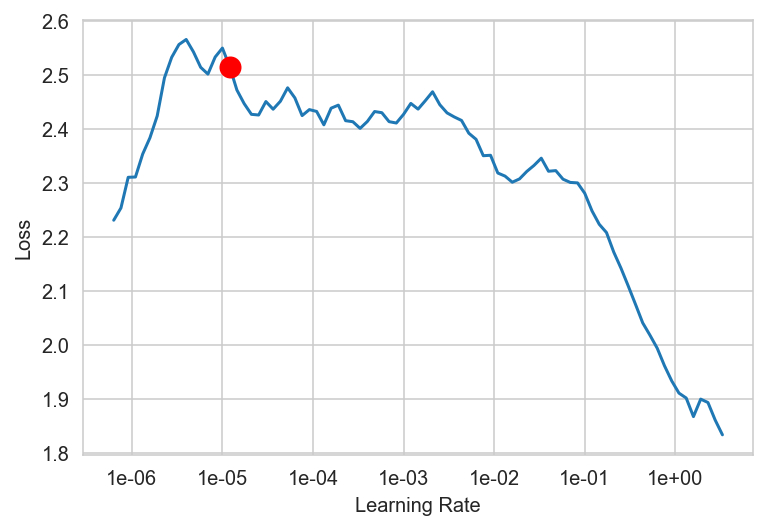

In [118]:
#plot the learning rate and get ready for next round training
learn.recorder.plot(suggestion=True)

In [119]:
#withdraw the learning rate from the tensor
lrs = learn.recorder.lrs
losses = learn.recorder.losses
mg = (np.gradient(np.array(losses))).argmin()
ml = np.argmin(losses)
min_grad_lr = lrs[mg]
min_loss_lr = lrs[ml]/10

In [120]:
#start the training cycle
learn.fit_one_cycle(10,min_loss_lr)

epoch,train_loss,valid_loss,mean_absolute_error,r2_score,time
0,1.066787,0.613172,-0.681787,0.051208,06:25
1,0.685927,0.558756,-0.629305,0.137660,06:08
2,0.582546,0.452784,-0.558118,0.277327,05:57
3,0.517924,0.407103,-0.510600,0.327638,06:03
4,0.470938,0.402481,-0.504181,0.331693,06:18
5,0.436508,0.399474,-0.502815,0.338273,06:24
6,0.417000,0.389709,-0.489613,0.354916,06:18
7,0.405457,0.384550,-0.486180,0.366300,06:49
8,0.401130,0.384701,-0.494101,0.367970,06:28
9,0.379956,0.390461,-0.497481,0.354409,3:39:24


Better model found at epoch 0 with mean_absolute_error value: -0.6817870736122131.
Better model found at epoch 1 with mean_absolute_error value: -0.629305362701416.
Better model found at epoch 2 with mean_absolute_error value: -0.5581175088882446.
Better model found at epoch 3 with mean_absolute_error value: -0.510599672794342.
Better model found at epoch 4 with mean_absolute_error value: -0.5041813254356384.
Better model found at epoch 5 with mean_absolute_error value: -0.5028152465820312.
Better model found at epoch 6 with mean_absolute_error value: -0.48961278796195984.
Better model found at epoch 7 with mean_absolute_error value: -0.48617982864379883.
Epoch 8: reducing lr to 2.971162079191577e-05
Epoch 9: reducing lr to 2.4e-09
set state called


set state called


set state called
LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.58E-10
Min loss divided by 10: 2.09E-11


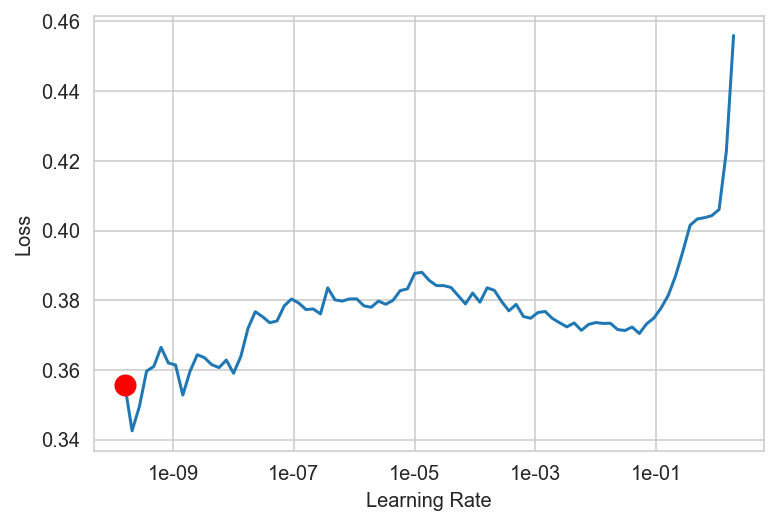

In [121]:
learn.save('first')
learn.load('first');
learn.freeze_to(-2)
learn.lr_find(start_lr=1e-11)
learn.recorder.plot(suggestion=True)
lrs = learn.recorder.lrs
losses = learn.recorder.losses
mg = (np.gradient(np.array(losses))).argmin()
ml = ml = np.argmin(losses)
min_grad_lr = lrs[mg]
min_loss_lr = lrs[ml]/10

In [122]:
#train the last two layers
learn.freeze_to(-2)
learn.fit_one_cycle(10, slice(min_grad_lr,min_loss_lr))
#learn.fit_one_cycle(4, 4.37e-2, moms=(0.85,0.75))

epoch,train_loss,valid_loss,mean_absolute_error,r2_score,time
0,0.409846,0.385422,-0.491280,0.367184,06:31
1,0.393666,0.384012,-0.490411,0.368712,07:02
2,0.377684,0.381140,-0.487051,0.375749,07:18
3,0.377017,0.385457,-0.497184,0.367626,07:06
4,0.372538,0.386860,-0.493329,0.361900,06:35
5,0.362318,0.384172,-0.493664,0.368665,06:34
6,0.363730,0.384783,-0.492426,0.366823,06:59
7,0.367366,0.383907,-0.493990,0.372307,06:51
8,0.364232,0.382869,-0.489491,0.370683,06:09
9,0.367103,0.386450,-0.493357,0.362845,06:24


Better model found at epoch 0 with mean_absolute_error value: -0.491280198097229.
Better model found at epoch 1 with mean_absolute_error value: -0.49041131138801575.
Better model found at epoch 2 with mean_absolute_error value: -0.48705050349235535.
Epoch 3: reducing lr to 1.3151494116188194e-12
Epoch 4: reducing lr to 1.1231815678225835e-12
Epoch 5: reducing lr to 8.457799962441106e-13
Epoch 6: reducing lr to 5.378874802415298e-13
Epoch 7: reducing lr to 2.6048590866305724e-13
Epoch 8: reducing lr to 6.851806486682117e-14
Epoch 9: reducing lr to 5.5346477673514925e-18
set state called


In [123]:
# learn.save('second')
# learn.load('second');
# learn.freeze_to(-3)
# learn.fit_one_cycle(1, slice(4e-3/(2.6**4),4e-3), moms=(0.85,0.75))

set state called


set state called
LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.58E-10
Min loss divided by 10: 3.63E-11


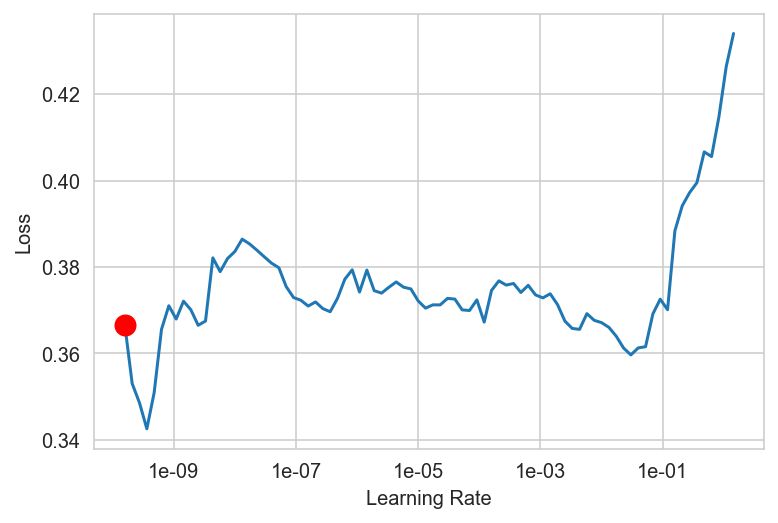

In [124]:
#train all the layers, load the model, unfreeze layers, find learning rate and unfreeze everything then train. you need to 
#unfreeze twice because finding the learning rate will reset the first unfreeze
learn.save('third')
learn.load('third');
learn.unfreeze()
learn.lr_find(start_lr=1e-11)
learn.recorder.plot(suggestion=True)
lrs = learn.recorder.lrs
losses = learn.recorder.losses
mg = (np.gradient(np.array(losses))).argmin()
ml = np.argmin(losses)
min_grad_lr = lrs[mg]
min_loss_lr = lrs[ml]/10

In [125]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr = min_loss_lr*2)

epoch,train_loss,valid_loss,mean_absolute_error,r2_score,time
0,0.396747,0.386275,-0.494237,0.366162,14:28
1,0.382323,0.385655,-0.492631,0.367182,13:21


Better model found at epoch 0 with mean_absolute_error value: -0.49423715472221375.
Better model found at epoch 1 with mean_absolute_error value: -0.4926309883594513.
set state called


In [134]:
#extract experience from job description
def findym(x):
    rx = "\\d+\\s+years?\\s+(?:and\\s*)?\\d+\\s+months?|\\d+\\s+(?:months?|years?)";
    m = re.search(rx, x)
    return m

final_job2['experience'] = [findym(i)[0] if findym(i) is not None else 'Not Available' for i in final_job2.total.values]

In [135]:
final_job2.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
job_title,Data Associate,HSE Supervisor / Safety Officer Solar Farm - C...,Data Analytics Graduate,Privacy and Data Protection Specialist,Technology Specialist- Data Vault
location,Melbourne VIC,Cohuna VIC,Frankston VIC,Melbourne VIC,Melbourne VIC
work_type,Permanent,"Contract, Casual",Permanent,NaN,NaN
company_name,Inflo APAC Limited,Workfast Pty Ltd,Frankston City Council,PwC,Cognizant Technology Solutions
company_rating,Not Available,4.5,3.0,4.0,3.900000095367432
salary,"$50,000 - $59,999 a year",$45 an hour,"$61,648 - $77,513 a year","$85,000 a year","$100,000 - $149,000 a year"
desc,"THE COMPANYInflo is an agile, forward-thinking...",Workfast is seeking an experienced HSE Safety ...,Data Analytics Graduate\n\nPermanent Full Time...,Line of Service\nAssurance\nIndustry/Sector\nN...,About CognizantCognizant (Nasdaq-100: CTSH) is...
rate_type,year,hour,year,year,year
min,50000,45,61648,85000,100000


In [ ]:
learn.load('bestmodel');

In [159]:
[float(learn.predict(i)[0].obj) for i in final_job2.total.values[0:10]]

[1.332214117050171,
 1.3122398853302002,
 1.3109140396118164,
 1.9809468984603882,
 1.9487556219100952,
 0.10609251260757446,
 1.7354313135147095,
 1.832057237625122,
 1.1539032459259033,
 1.0321787595748901]

In [160]:
#Predicting the text and salary associate score
final_job2['textpredictionscore'] = [float(learn.predict(i)[0].obj) for i in final_job2.total.values]

In [163]:
final_job2 = final_job2.drop(columns = 'Unnamed: 0')

In [177]:
final_job2['company_rating'] = [np.NaN if i == 'Not Available' else float(i) for i in final_job2.company_rating.values]

In [178]:
final_job2.head().T

,0,1,2,3,4
job_title,Data Associate,HSE Supervisor / Safety Officer Solar Farm - C...,Data Analytics Graduate,Privacy and Data Protection Specialist,Technology Specialist- Data Vault
location,Melbourne VIC,Cohuna VIC,Frankston VIC,Melbourne VIC,Melbourne VIC
work_type,Permanent,"Contract, Casual",Permanent,NaN,NaN
company_name,Inflo APAC Limited,Workfast Pty Ltd,Frankston City Council,PwC,Cognizant Technology Solutions
company_rating,NaN,4.5,3,4,3.9
salary,"$50,000 - $59,999 a year",$45 an hour,"$61,648 - $77,513 a year","$85,000 a year","$100,000 - $149,000 a year"
desc,"THE COMPANYInflo is an agile, forward-thinking...",Workfast is seeking an experienced HSE Safety ...,Data Analytics Graduate\n\nPermanent Full Time...,Line of Service\nAssurance\nIndustry/Sector\nN...,About CognizantCognizant (Nasdaq-100: CTSH) is...
rate_type,year,hour,year,year,year
min,50000,45,61648,85000,100000
max,59999,45,77513,85000,149000


In [ ]:
#save the job data as backup again
final_job2.to_csv('fjobdata.csv', encoding='utf-8')

In [ ]:
len(final_job2)

In [6]:
#build tabular datamodel
from fastai.tabular import *

In [9]:
tabular_learner

<function fastai.tabular.data.tabular_learner(data:fastai.basic_data.DataBunch, layers:Collection[int], emb_szs:Dict[str, int]=None, metrics=None, ps:Collection[float]=None, emb_drop:float=0.0, y_range:Union[Tuple[float, float], NoneType]=None, use_bn:bool=True, **learn_kwargs)>

In [11]:
#defind the target, numeric and categorical variables
dep_var = 'salaryrank'
cat_names = ['state', 'experience', 'rate_type']
cont_names = ['company_rating','textpredictionscore']
procs = [FillMissing, Categorify, Normalize]

In [12]:
#generate some testdata incase we want to check how well the model is doing by viewing the confusion matrix
test = TabularList.from_df(final_job2.iloc[val_idx].copy(), path='./', cat_names=cat_names, cont_names=cont_names)

NameError: name 'final_job2' is not defined

In [13]:
#creating databunch
data = (TabularList.from_df(final_job2, path='./', cat_names=cat_names, cont_names=cont_names, procs=procs)
                           .split_by_idx(val_idx)
                           .label_from_df(cols=dep_var)
                           .add_test(test)
                           .databunch())

NameError: name 'final_job2' is not defined

In [14]:
#preview data
data.show_batch(rows=10)

AttributeError: module 'torchtext.data' has no attribute 'show_batch'

In [15]:
#build the tabular learning model
kappa = KappaScore()
kappa.weights = "quadratic"
learn = tabular_learner(data, layers=[300,100], metrics=[accuracy,FBeta(),kappa],
                        opt_func = optar,
                        callback_fns = [
                                partial(EarlyStoppingCallback, monitor='accuracy', min_delta=0.001, patience=3),
                                partial(ReduceLROnPlateauCallback),
#                               partial(GradientClipping, clip=0.2),
                                partial(SaveModelCallback, every = 'improvement', monitor='accuracy', name='bestfinal')],
                       )

NameError: name 'optar' is not defined

In [16]:
#train the last layer
learn.fit_one_cycle(20, max_lr = 5e-2,wd=1e-1)

NameError: name 'learn' is not defined

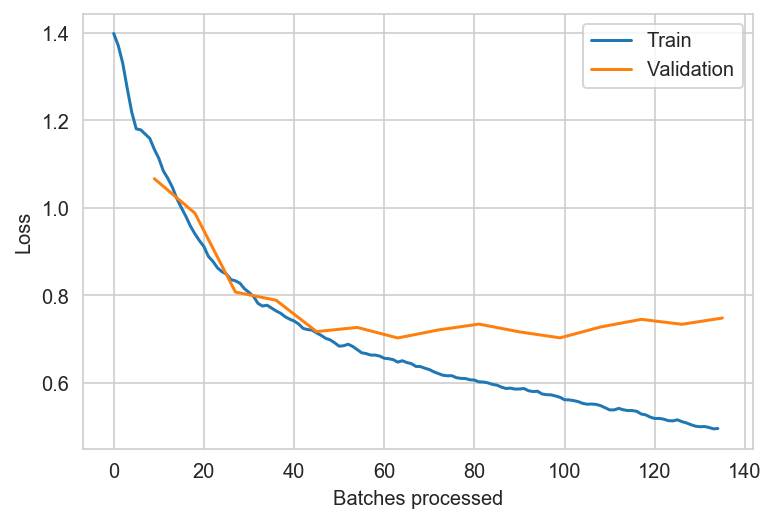

In [362]:
learn.recorder.plot_losses()

,Prediction,Actual,Loss,Probability,state,experience,rate_type,company_rating_na,company_rating,textpredictionscore
0,2.0,1.0,5.51,0.00,QLD,Available,year,False,0.3986,1.5375
1,2.0,0.0,5.25,0.01,QLD,Available,day,False,-0.5259,1.1495
2,2.0,0.0,4.73,0.01,NSW,years,day,False,-0.9882,1.1593
3,0.0,2.0,4.02,0.02,NSW,Available,year,False,-0.0637,-1.2227
4,2.0,0.0,3.73,0.02,NSW,month,day,True,0.1675,0.4350
5,0.0,1.0,3.72,0.02,NSW,year,year,True,0.1675,-2.2723
6,2.0,0.0,3.63,0.03,VIC,Available,week,True,0.1675,0.6551
7,1.0,0.0,3.46,0.03,VIC,years,year,True,0.1675,0.1579
8,2.0,0.0,3.39,0.03,NSW,Available,week,True,0.1675,0.4844
9,0.0,1.0,3.33,0.04,NSW,year,year,True,0.1675,-2.0192


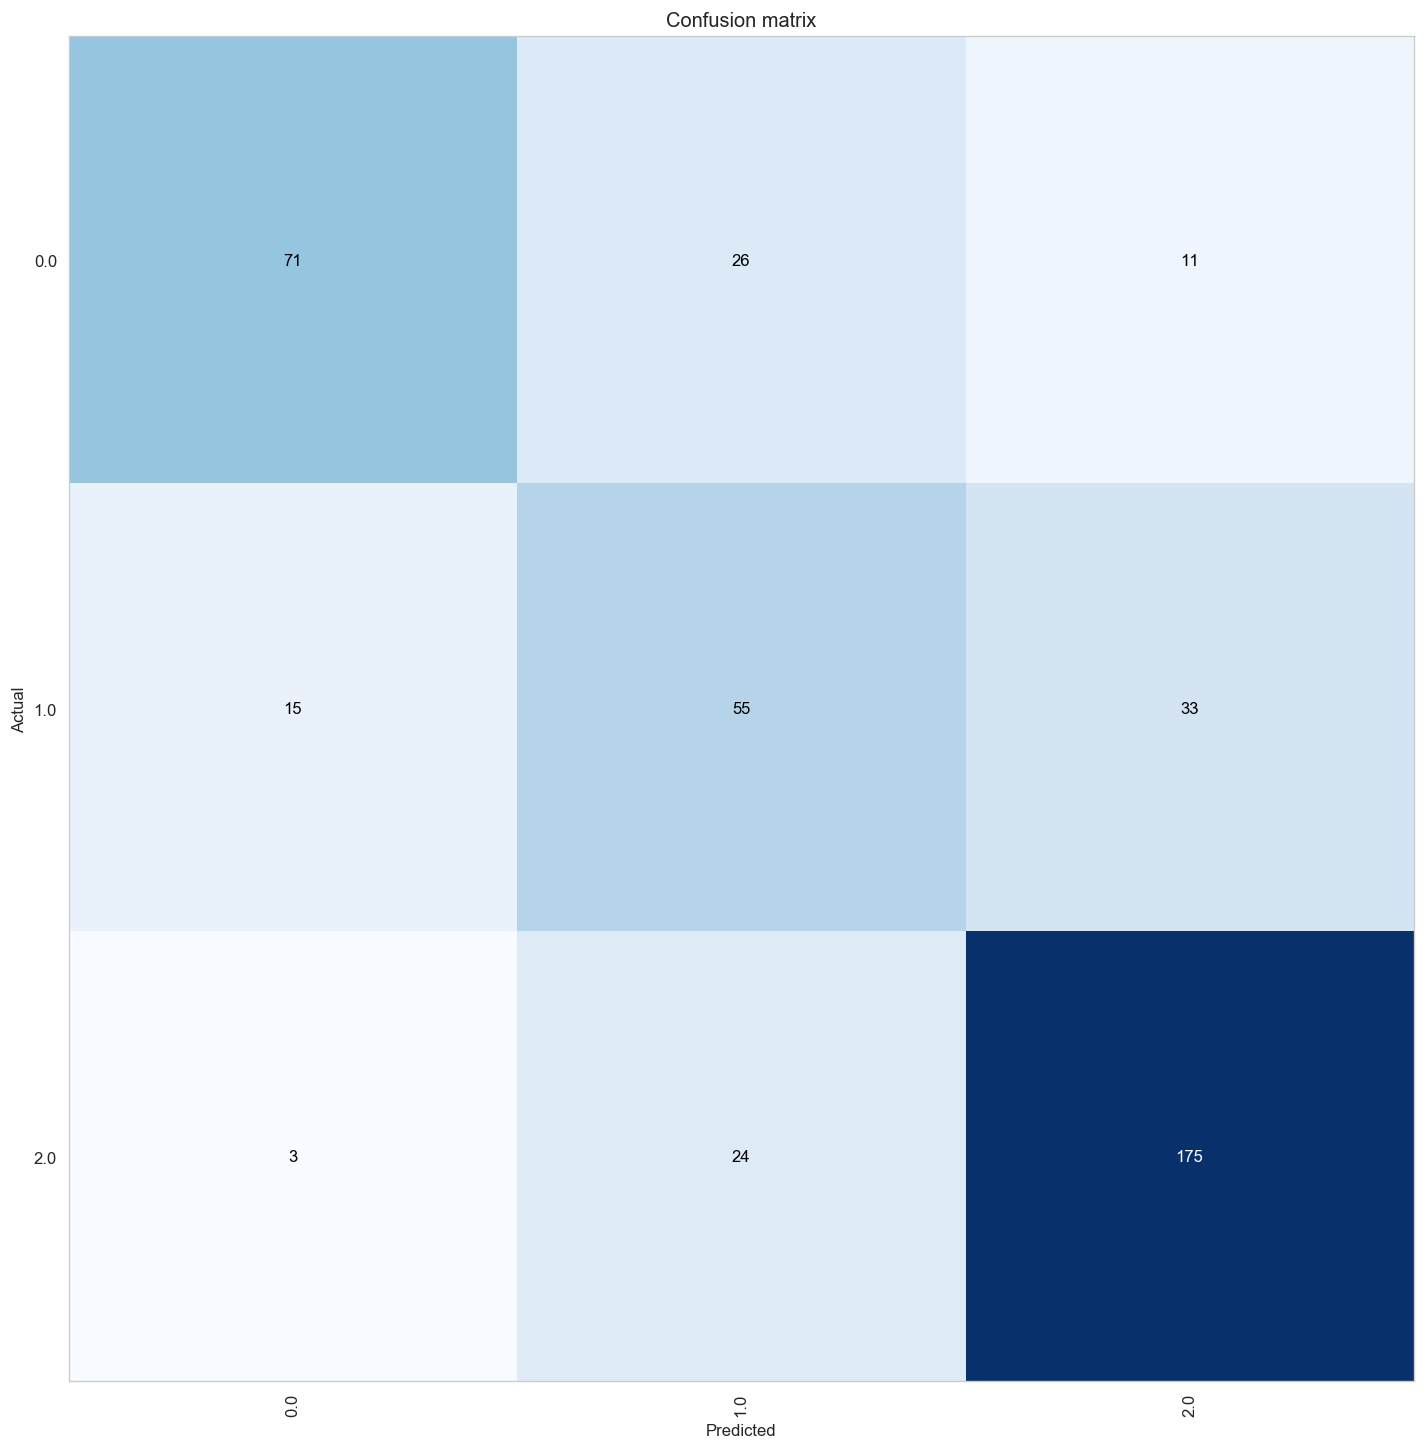

In [365]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)
interp.plot_top_losses(16)

In [316]:
#Check language encoder prediction skills
learn2 = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.4)
learn2.load('fine_tuned');
TEXT = "As Data analyst, we required the following skills:"
N_WORDS = 100
N_SENTENCES = 20

In [317]:
learn2.predict(TEXT, N_WORDS, temperature=0.75)

'As Data analyst, we required the following skills: \n  Experience working in a similar position \n  Proficient in a number of areas of interest \n  Experience with large scale stakeholder engagement , engineering , and other computer software \n  Experience with Microsoft Office suite including c # , SAS , Outlook , SQL , Excel , SQL , and HTML ( Java , Excel , Java , Tableau , etc . ) \n  Experience in translating data into business processes \n  Demonstrated ability to effectively work independently and independently as'

In [376]:
# learn2 = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.4)
# learn2.load('fine_tuned');
TEXT = "$80,000 a year, experienced, we required the following skills:"
N_WORDS = 100
N_SENTENCES = 20

In [383]:
learn2.predict(TEXT, N_WORDS, temperature=0.75)

'$80,000 a year, experienced, we required the following skills: Preferred , Preferred Language Processing , Language Processing ( ) , Human Services ( NDIS ) , Computer Science , Software , Human Resources , Software Engineering , Computer Science , Engineering , Human Information Systems ( NDIS ) , Computer Science ( HTML , CSS ) , Java , Excel , Power Point , Power Point , Outlook , Power Point ,'